# **A comaprtive analysis DSPy versus a direct API **---- HECTOR ----HNM

**Install Required Libraries**

In [1]:
!pip install openai PyPDF2 matplotlib tiktoken
!pip install dspy


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 232.6/232.6 kB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 23.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 259.0/259.0 kB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 485.4/485.4 kB 12.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 11.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 567.4/567.4 kB 9.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.5/45.5 kB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 383.6/383.6 kB 8.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.6/53.6 kB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 231.8/231.8 kB 8.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 7.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.5/143.5 kB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.8

**Setup OpenAI API and Import Libraries**

In [2]:
import openai
import dspy
import matplotlib.pyplot as plt

# Set your OpenAI API key here
openai.api_key = "Your_API_KEY"

# Configure DSPy with your language model (using GPT-4)
lm = dspy.LM("openai/gpt-4", api_key=openai.api_key)
dspy.configure(lm=lm)

# For reproducibility
import random
random.seed(42)


**Helper Function for Direct API Calls**

In [11]:
def direct_question_answering(question):
    prompt = f"Answer the following question clearly:\n\nQuestion: {question}\nAnswer:"
    # Initialize the OpenAI client, passing the api_key explicitly
    client = openai.OpenAI(api_key=openai.api_key)
    # Use the new client.chat.completions.create method
    response = client.chat.completions.create(
        model="gpt-4",
        messages=[
            {"role": "system", "content": "You are an expert question answering assistant."},
            {"role": "user", "content": prompt}
        ],
        max_tokens=50,
        temperature=0.5
    )
    # Access the content using .content instead of ['content']
    return response.choices[0].message.content.strip()

def direct_summarization(passage):
    prompt = (
        "You are an expert summarizer. Please provide a clear, structured, and comprehensive summary of the following text. "
        "Use chain-of-thought reasoning to explain key points and then produce the final summary.\n\nPassage:\n" + passage
    )
    # Initialize the OpenAI client, passing the api_key explicitly
    client = openai.OpenAI(api_key=openai.api_key)
    # Use the new client.chat.completions.create method
    response = client.chat.completions.create(
        model="gpt-4",
        messages=[
            {"role": "system", "content": "You are a summarization expert."},
            {"role": "user", "content": prompt}
        ],
        max_tokens=300,
        temperature=0.7
    )
    # Access the content using .content instead of ['content']
    return response.choices[0].message.content.strip()

def direct_code_generation(description):
    prompt = f"Generate a Python function based on the following description:\n\nDescription: {description}\n\nCode:"
    # Initialize the OpenAI client, passing the api_key explicitly
    client = openai.OpenAI(api_key=openai.api_key)
    # Use the new client.chat.completions.create method
    response = client.chat.completions.create(
        model="gpt-4",
        messages=[
            {"role": "system", "content": "You are a coding expert."},
            {"role": "user", "content": prompt}
        ],
        max_tokens=150,
        temperature=0.3
    )
    # Access the content using .content instead of ['content']
    return response.choices[0].message.content.strip()

def direct_sentiment_classification(text):
    prompt = (
        "Classify the sentiment of the following text as either positive, negative, or neutral. "
        "Provide only the sentiment word.\n\nText: " + text
    )
    # Initialize the OpenAI client, passing the api_key explicitly
    client = openai.OpenAI(api_key=openai.api_key)
    # Use the new client.chat.completions.create method
    response = client.chat.completions.create(
        model="gpt-4",
        messages=[
            {"role": "system", "content": "You are an expert sentiment analyzer."},
            {"role": "user", "content": prompt}
        ],
        max_tokens=10,
        temperature=0.3
    )
    # Access the content using .content instead of ['content']
    return response.choices[0].message.content.strip()

**DSPy Modules for Each Task**

**Question Answering Module**

In [12]:
# Using DSPy for Question Answering
class QA_Signature(dspy.Signature):
    question = dspy.InputField(desc="The question to answer.")
    answer: str = dspy.OutputField(desc="The answer to the question.")

qa_module = dspy.Predict(QA_Signature)

# DSPy approach
dspy_qa_output = qa_module(question="What is the capital of France?").answer

# Direct approach
direct_qa_output = direct_question_answering("What is the capital of France?")

# Expected answer (for evaluation)
expected_qa = "Paris"

print("Question Answering Comparison:")
print("DSPy Output:", dspy_qa_output)
print("Direct API Output:", direct_qa_output)

# Simple evaluation: compute a binary score (1 if expected answer is found, 0 otherwise)
def evaluate_answer(answer, expected):
    return 1 if expected.lower() in answer.lower() else 0

qa_score_dspy = evaluate_answer(dspy_qa_output, expected_qa)
qa_score_direct = evaluate_answer(direct_qa_output, expected_qa)
print("\nEvaluation Scores:")
print("DSPy Score:", qa_score_dspy)
print("Direct Score:", qa_score_direct)


Question Answering Comparison:
DSPy Output: The capital of France is Paris.
Direct API Output: The capital of France is Paris.

Evaluation Scores:
DSPy Score: 1
Direct Score: 1



**Text Summarization Module**

In [13]:
# Sample passage for summarization
passage = (
    "OpenAI has developed a series of groundbreaking language models that have advanced the field of natural language processing. "
    "These models have been used in applications ranging from question answering and text summarization to code generation and creative writing. "
    "The development of these models has also spurred research into improving model interpretability and reducing biases. "
    "Recent innovations include GPT-4, which further pushes the boundaries of what artificial intelligence can achieve."
)

# Define a custom summarization signature using DSPy
class SummarizeSignature(dspy.Signature):
    passage = dspy.InputField(desc="Text to be summarized.")
    summary: str = dspy.OutputField(desc="The generated summary.")

summarizer_module = dspy.ChainOfThought(SummarizeSignature)

# Custom prompt for summarization (using chain-of-thought reasoning)
custom_summary_prompt = (
    "You are an expert summarizer. Use chain-of-thought reasoning to break down the passage and then generate a clear and structured summary. "
    "Include key points about advancements, applications, and innovations.\n\nPassage:\n"
)

# DSPy approach
dspy_summary = summarizer_module(passage=passage, prompt=custom_summary_prompt).summary

# Direct approach
direct_summary = direct_summarization(passage)

print("Text Summarization Comparison:")
print("DSPy Summary:\n", dspy_summary)
print("\nDirect API Summary:\n", direct_summary)

# Dummy evaluation: Count overlap in keywords (this is illustrative)
def evaluate_summary(summary, keywords):
    score = sum(1 for word in keywords if word.lower() in summary.lower())
    return score

keywords = ["OpenAI", "language models", "applications", "GPT-4", "innovations"]
summary_score_dspy = evaluate_summary(dspy_summary, keywords)
summary_score_direct = evaluate_summary(direct_summary, keywords)

print("\nEvaluation Scores:")
print("DSPy Summary Score:", summary_score_dspy)
print("Direct Summary Score:", summary_score_direct)


Text Summarization Comparison:
DSPy Summary:
 OpenAI has made significant strides in natural language processing with its series of groundbreaking language models. These models have diverse applications, including question answering, text summarization, code generation, and creative writing. Efforts are ongoing to improve model interpretability and reduce biases. The latest innovation, GPT-4, represents a new milestone in artificial intelligence capabilities.

Direct API Summary:
 Summary:

OpenAI has made significant strides in the realm of natural language processing by developing a series of revolutionary language models. These models serve diverse applications such as question answering, text summarization, code generation, and creative writing. Such advancements have triggered further research into enhancing the interpretability of these models and minimizing biases. The most recent innovation in this series is GPT-4, setting a new level of achievement for artificial intelligence.


**Code Generation Module**

In [14]:
# Description for code generation
code_description = "Write a Python function that takes a number as input and returns its square."

# Define a custom code generation signature using DSPy
class CodeGenSignature(dspy.Signature):
    description = dspy.InputField(desc="Description of the code to generate.")
    code: str = dspy.OutputField(desc="The generated code snippet.")

codegen_module = dspy.Predict(CodeGenSignature)

# DSPy approach
dspy_code_output = codegen_module(description=code_description).code

# Direct approach
direct_code_output = direct_code_generation(code_description)

print("Code Generation Comparison:")
print("DSPy Generated Code:\n", dspy_code_output)
print("\nDirect API Generated Code:\n", direct_code_output)

# Dummy evaluation: Check if the word "def" is in the output as a proxy for valid Python function
def evaluate_code(code):
    return 1 if "def " in code else 0

code_score_dspy = evaluate_code(dspy_code_output)
code_score_direct = evaluate_code(direct_code_output)

print("\nEvaluation Scores:")
print("DSPy Code Score:", code_score_dspy)
print("Direct Code Score:", code_score_direct)


Code Generation Comparison:
DSPy Generated Code:
 def square_number(num):
    return num ** 2

Direct API Generated Code:
 Here is the Python function based on your description:

```python
def square_number(num):
    return num ** 2
```

Evaluation Scores:
DSPy Code Score: 1
Direct Code Score: 1



**Sentiment Classification Module**


In [15]:
# Sample text for sentiment classification
text_to_classify = "I absolutely loved the new design and the user experience was fantastic!"

# Define a custom sentiment classification signature using DSPy
from typing import Literal
class SentimentSignature(dspy.Signature):
    text = dspy.InputField(desc="Text for sentiment analysis.")
    sentiment: Literal['positive', 'negative', 'neutral'] = dspy.OutputField(desc="Predicted sentiment.")

sentiment_module = dspy.Predict(SentimentSignature)

# DSPy approach
dspy_sentiment_output = sentiment_module(text=text_to_classify).sentiment

# Direct approach using our helper function
direct_sentiment_output = direct_sentiment_classification(text_to_classify)

print("Sentiment Classification Comparison:")
print("DSPy Sentiment:", dspy_sentiment_output)
print("Direct API Sentiment:", direct_sentiment_output)

# Dummy evaluation: expected sentiment is "positive"
def evaluate_sentiment(sentiment, expected="positive"):
    return 1 if sentiment.lower() == expected.lower() else 0

sentiment_score_dspy = evaluate_sentiment(dspy_sentiment_output)
sentiment_score_direct = evaluate_sentiment(direct_sentiment_output)

print("\nEvaluation Scores:")
print("DSPy Sentiment Score:", sentiment_score_dspy)
print("Direct Sentiment Score:", sentiment_score_direct)


Sentiment Classification Comparison:
DSPy Sentiment: positive
Direct API Sentiment: Positive

Evaluation Scores:
DSPy Sentiment Score: 1
Direct Sentiment Score: 1


**Benchmark for Each Task**

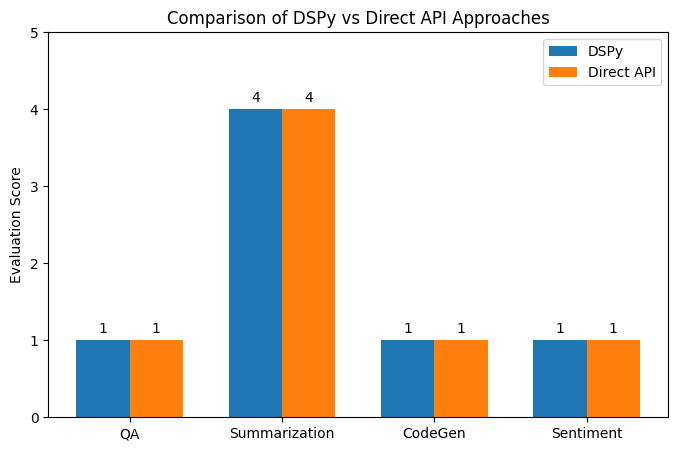

In [16]:
import numpy as np

# Collect scores (binary scores: 1 is good, 0 is not)
tasks = ["QA", "Summarization", "CodeGen", "Sentiment"]
scores_dspy = [qa_score_dspy, summary_score_dspy, code_score_dspy, sentiment_score_dspy]
scores_direct = [qa_score_direct, summary_score_direct, code_score_direct, sentiment_score_direct]

x = np.arange(len(tasks))  # task indices
width = 0.35  # width of the bars

fig, ax = plt.subplots(figsize=(8, 5))
rects1 = ax.bar(x - width/2, scores_dspy, width, label='DSPy')
rects2 = ax.bar(x + width/2, scores_direct, width, label='Direct API')

# Add labels, title, and custom x-axis tick labels
ax.set_ylabel('Evaluation Score')
ax.set_title('Comparison of DSPy vs Direct API Approaches')
ax.set_xticks(x)
ax.set_xticklabels(tasks)
ax.legend()

# Annotate bars with scores
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height}',
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)

plt.ylim(0, max(max(scores_dspy), max(scores_direct)) + 1)
plt.show()


# Level    2      Evaluation

**Question Answering Module L2**

In [17]:
class QA_Signature(dspy.Signature):
    question = dspy.InputField(desc="The question to answer.")
    answer: str = dspy.OutputField(desc="The answer to the question.")

qa_module = dspy.Predict(QA_Signature)


**Text Summarization Module L2**

In [18]:
class SummarizeSignature(dspy.Signature):
    passage = dspy.InputField(desc="Text to be summarized.")
    summary: str = dspy.OutputField(desc="The generated summary.")

# Use ChainOfThought for in-depth summarization with reasoning.
summarizer_module = dspy.ChainOfThought(SummarizeSignature)
custom_summary_prompt = (
    "You are an expert summarizer. Use chain-of-thought reasoning to break down the passage, "
    "explain key points (objectives, methodology, findings, conclusions), and then produce a clear, structured summary.\n\nPassage:\n"
)


**Code Generation Module L2**

In [19]:
class CodeGenSignature(dspy.Signature):
    description = dspy.InputField(desc="Description of the code to generate.")
    code: str = dspy.OutputField(desc="The generated code snippet.")

codegen_module = dspy.Predict(CodeGenSignature)


**Sentiment Classification Module  L2**

In [20]:
from typing import Literal
class SentimentSignature(dspy.Signature):
    text = dspy.InputField(desc="Text for sentiment analysis.")
    sentiment: Literal['positive', 'negative', 'neutral'] = dspy.OutputField(desc="Predicted sentiment.")

sentiment_module = dspy.Predict(SentimentSignature)



**L2 Benchmark Samples for Each Task**

In [21]:
# Question Answering Benchmarks
qa_benchmarks = [
    {"question": "What is the capital of France?", "expected": "Paris"},
    {"question": "Who wrote 'To Kill a Mockingbird'?", "expected": "Harper Lee"},
    {"question": "What is the largest planet in our solar system?", "expected": "Jupiter"},
    {"question": "In which year did the Titanic sink?", "expected": "1912"}
]

# Text Summarization Benchmarks (passages and expected keywords for evaluation)
summarization_benchmarks = [
    {"passage": "OpenAI has developed state-of-the-art language models like GPT-3 and GPT-4 that have revolutionized natural language processing.",
     "keywords": ["OpenAI", "GPT-4", "revolutionized", "language models", "NLP"]},
    {"passage": "The United Nations held a conference on climate change, discussing global warming and sustainable development.",
     "keywords": ["United Nations", "climate change", "global warming", "sustainable development"]},
    {"passage": "Recent research in quantum computing has shown promising results in solving complex problems.",
     "keywords": ["quantum computing", "research", "promising", "complex problems"]},
    {"passage": "The novel '1984' by George Orwell explores themes of surveillance, totalitarianism, and individual freedom.",
     "keywords": ["1984", "George Orwell", "surveillance", "totalitarianism", "freedom"]}
]

# Code Generation Benchmarks
codegen_benchmarks = [
    {"description": "Write a Python function that returns the factorial of a number.", "expected_substring": "def"},
    {"description": "Write a Python function that sorts a list of integers using bubble sort.", "expected_substring": "bubble"},
    {"description": "Write a Python function that generates the Fibonacci sequence up to n.", "expected_substring": "Fibonacci"},
    {"description": "Write a Python function that checks if a given string is a palindrome.", "expected_substring": "palindrome"}
]

# Sentiment Classification Benchmarks
sentiment_benchmarks = [
    {"text": "I absolutely loved the new movie, it was fantastic and inspiring!", "expected": "positive"},
    {"text": "The service at the restaurant was terrible and the food was disappointing.", "expected": "negative"},
    {"text": "The product is okay, not too bad but nothing exceptional.", "expected": "neutral"},
    {"text": "I am not really sure how I feel about the new policy.", "expected": "neutral"}
]


**Evaluation Helper Functions**


In [22]:
def evaluate_answer(answer, expected):
    # Return 1 if expected answer is found (case-insensitive), else 0.
    return 1 if expected.lower() in answer.lower() else 0

def evaluate_summary(summary, keywords):
    # Simple score: count how many expected keywords appear in the summary.
    return sum(1 for word in keywords if word.lower() in summary.lower())

def evaluate_code(code, expected_substring):
    # Check if expected substring (e.g., "def" or "bubble") is present.
    return 1 if expected_substring.lower() in code.lower() else 0

def evaluate_sentiment(sentiment, expected):
    return 1 if sentiment.lower() == expected.lower() else 0


**Benchmark – Question Answering Comparison**

In [23]:
qa_results = []
for sample in qa_benchmarks:
    q = sample["question"]
    expected = sample["expected"]

    # DSPy approach
    dspy_output = qa_module(question=q).answer
    score_dspy = evaluate_answer(dspy_output, expected)

    # Direct approach
    direct_output = direct_question_answering(q)
    score_direct = evaluate_answer(direct_output, expected)

    qa_results.append({
        "question": q,
        "expected": expected,
        "dspy_output": dspy_output,
        "direct_output": direct_output,
        "dspy_score": score_dspy,
        "direct_score": score_direct
    })

# Print QA results
print("Question Answering Benchmarks:")
for res in qa_results:
    print(f"Q: {res['question']}")
    print(f"Expected: {res['expected']}")
    print(f"DSPy: {res['dspy_output']} (Score: {res['dspy_score']})")
    print(f"Direct: {res['direct_output']} (Score: {res['direct_score']})")
    print("-" * 50)


Question Answering Benchmarks:
Q: What is the capital of France?
Expected: Paris
DSPy: The capital of France is Paris. (Score: 1)
Direct: The capital of France is Paris. (Score: 1)
--------------------------------------------------
Q: Who wrote 'To Kill a Mockingbird'?
Expected: Harper Lee
DSPy: Harper Lee (Score: 1)
Direct: 'To Kill a Mockingbird' was written by Harper Lee. (Score: 1)
--------------------------------------------------
Q: What is the largest planet in our solar system?
Expected: Jupiter
DSPy: The largest planet in our solar system is Jupiter. (Score: 1)
Direct: The largest planet in our solar system is Jupiter. (Score: 1)
--------------------------------------------------
Q: In which year did the Titanic sink?
Expected: 1912
DSPy: The Titanic sank in the year 1912. (Score: 1)
Direct: The Titanic sank in the year 1912. (Score: 1)
--------------------------------------------------


**Benchmark – Text Summarization Comparison**

In [24]:
summ_results = []
for sample in summarization_benchmarks:
    passage = sample["passage"]
    keywords = sample["keywords"]

    # DSPy approach
    dspy_summary = summarizer_module(passage=passage, prompt=custom_summary_prompt).summary
    score_dspy = evaluate_summary(dspy_summary, keywords)

    # Direct approach
    direct_summary = direct_summarization(passage)
    score_direct = evaluate_summary(direct_summary, keywords)

    summ_results.append({
        "passage": passage,
        "keywords": keywords,
        "dspy_summary": dspy_summary,
        "direct_summary": direct_summary,
        "dspy_score": score_dspy,
        "direct_score": score_direct
    })

# Print Summarization results
print("Text Summarization Benchmarks:")
for res in summ_results:
    print("Passage:", res["passage"])
    print("Expected Keywords:", res["keywords"])
    print("DSPy Summary:\n", res["dspy_summary"], f"(Score: {res['dspy_score']})")
    print("Direct Summary:\n", res["direct_summary"], f"(Score: {res['direct_score']})")
    print("-" * 50)


Text Summarization Benchmarks:
Passage: OpenAI has developed state-of-the-art language models like GPT-3 and GPT-4 that have revolutionized natural language processing.
Expected Keywords: ['OpenAI', 'GPT-4', 'revolutionized', 'language models', 'NLP']
DSPy Summary:
 OpenAI has created advanced language models, GPT-3 and GPT-4, revolutionizing the field of natural language processing. (Score: 3)
Direct Summary:
 The given text focuses on the significant advancements made by OpenAI in the field of natural language processing. It emphasizes the development of advanced language models, notably GPT-3 and GPT-4, which have been instrumental in revolutionizing this area.

Summary:
OpenAI, a leading entity in artificial intelligence, has pioneered the evolution of natural language processing by creating high-level language models, specifically GPT-3 and GPT-4. These advancements have marked a significant transformation in how natural language processing is practiced and understood. (Score: 3)


**Benchmark – Code Generation Comparison**

In [25]:
code_results = []
for sample in codegen_benchmarks:
    description = sample["description"]
    expected_substring = sample["expected_substring"]

    # DSPy approach
    dspy_code = codegen_module(description=description).code
    score_dspy = evaluate_code(dspy_code, expected_substring)

    # Direct approach
    direct_code = direct_code_generation(description)
    score_direct = evaluate_code(direct_code, expected_substring)

    code_results.append({
        "description": description,
        "expected_substring": expected_substring,
        "dspy_code": dspy_code,
        "direct_code": direct_code,
        "dspy_score": score_dspy,
        "direct_score": score_direct
    })

# Print Code Generation results
print("Code Generation Benchmarks:")
for res in code_results:
    print("Description:", res["description"])
    print("Expected substring:", res["expected_substring"])
    print("DSPy Code:\n", res["dspy_code"], f"(Score: {res['dspy_score']})")
    print("Direct Code:\n", res["direct_code"], f"(Score: {res['direct_score']})")
    print("-" * 50)


Code Generation Benchmarks:
Description: Write a Python function that returns the factorial of a number.
Expected substring: def
DSPy Code:
 def factorial(n):
    if n == 0:
        return 1
    else:
        return n * factorial(n-1) (Score: 1)
Direct Code:
 Here is a Python function that calculates the factorial of a number:

```python
def factorial(n):
    if n == 0:
        return 1
    else:
        return n * factorial(n-1)
```

This function uses recursion to calculate the factorial. It checks if the number is 0, in which case it returns 1 (since the factorial of 0 is 1). Otherwise, it multiplies the number by the factorial of the number minus 1. This process continues until it reaches 0, at which point it starts returning the results back up the chain. (Score: 1)
--------------------------------------------------
Description: Write a Python function that sorts a list of integers using bubble sort.
Expected substring: bubble
DSPy Code:
 def bubble_sort(lst):
    n = len(lst)
   

**Benchmark – Sentiment Classification Comparison**

In [26]:
sentiment_results = []
for sample in sentiment_benchmarks:
    text = sample["text"]
    expected = sample["expected"]

    # DSPy approach
    dspy_sent = sentiment_module(text=text).sentiment
    score_dspy = evaluate_sentiment(dspy_sent, expected)

    # Direct approach
    direct_sent = direct_sentiment_classification(text)
    score_direct = evaluate_sentiment(direct_sent, expected)

    sentiment_results.append({
        "text": text,
        "expected": expected,
        "dspy_sent": dspy_sent,
        "direct_sent": direct_sent,
        "dspy_score": score_dspy,
        "direct_score": score_direct
    })

# Print Sentiment Classification results
print("Sentiment Classification Benchmarks:")
for res in sentiment_results:
    print("Text:", res["text"])
    print("Expected:", res["expected"])
    print("DSPy Sentiment:", res["dspy_sent"], f"(Score: {res['dspy_score']})")
    print("Direct Sentiment:", res["direct_sent"], f"(Score: {res['direct_score']})")
    print("-" * 50)


Sentiment Classification Benchmarks:
Text: I absolutely loved the new movie, it was fantastic and inspiring!
Expected: positive
DSPy Sentiment: positive (Score: 1)
Direct Sentiment: Positive (Score: 1)
--------------------------------------------------
Text: The service at the restaurant was terrible and the food was disappointing.
Expected: negative
DSPy Sentiment: negative (Score: 1)
Direct Sentiment: Negative (Score: 1)
--------------------------------------------------
Text: The product is okay, not too bad but nothing exceptional.
Expected: neutral
DSPy Sentiment: neutral (Score: 1)
Direct Sentiment: Neutral (Score: 1)
--------------------------------------------------
Text: I am not really sure how I feel about the new policy.
Expected: neutral
DSPy Sentiment: neutral (Score: 1)
Direct Sentiment: neutral (Score: 1)
--------------------------------------------------


**Comparative Evaluation Graphs**

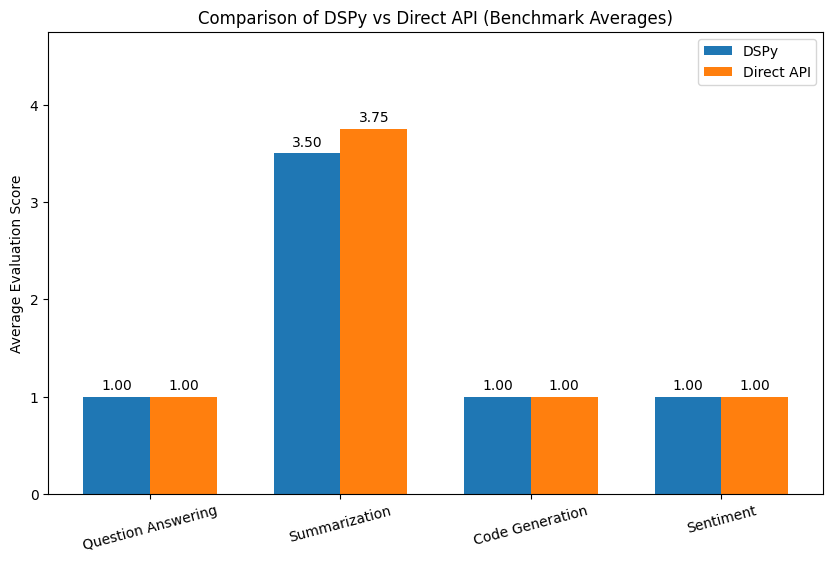

In [27]:
# For each task, compute average scores.
def avg_score(results, key):
    return np.mean([res[key] for res in results])

avg_qa_dspy = avg_score(qa_results, "dspy_score")
avg_qa_direct = avg_score(qa_results, "direct_score")

avg_summ_dspy = avg_score(summ_results, "dspy_score")
avg_summ_direct = avg_score(summ_results, "direct_score")

avg_code_dspy = avg_score(code_results, "dspy_score")
avg_code_direct = avg_score(code_results, "direct_score")

avg_sent_dspy = avg_score(sentiment_results, "dspy_score")
avg_sent_direct = avg_score(sentiment_results, "direct_score")

# Prepare data for plotting
tasks = ["Question Answering", "Summarization", "Code Generation", "Sentiment"]
dspy_scores = [avg_qa_dspy, avg_summ_dspy, avg_code_dspy, avg_sent_dspy]
direct_scores = [avg_qa_direct, avg_summ_direct, avg_code_direct, avg_sent_direct]

x = np.arange(len(tasks))
width = 0.35

fig, ax = plt.subplots(figsize=(10, 6))
bars1 = ax.bar(x - width/2, dspy_scores, width, label='DSPy')
bars2 = ax.bar(x + width/2, direct_scores, width, label='Direct API')

ax.set_ylabel('Average Evaluation Score')
ax.set_title('Comparison of DSPy vs Direct API (Benchmark Averages)')
ax.set_xticks(x)
ax.set_xticklabels(tasks, rotation=15)
ax.legend()

def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height:.2f}',
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0,3),
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(bars1)
autolabel(bars2)

plt.ylim(0, max(max(dspy_scores), max(direct_scores)) + 1)
plt.show()


**THANK-YOU**